# Importing Libraries

In [87]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Loading Data from CSV file

In [88]:
df= pd.read_csv("tested.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Identifying Missing / Null Values and Handling them

In [89]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have large number of null values in age and cabins and only single null value in fare. 

In [90]:
df.iloc[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


Since Cabin feature will not be used in the following EDA and it has a large number of null values, we are going to drop it to make our data simpler.

In [91]:
df.drop(columns='Cabin',inplace=True)

Filling the null value in fare with mean of all the fares.

In [92]:
df.Fare.fillna(df.Fare.mean(),inplace=True)
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

Filling null values in age with the median of Age feature.

In [93]:
df.Age.fillna(df.Age.median(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Check for Duplicates

In [106]:
df.duplicated().sum()


np.int64(0)

# Check Data Consistency

In [95]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [96]:
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [97]:
df.Ticket.unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

Ticket feature will also not going to be used in this EDA, so dropping it is the best option.

In [98]:
df.drop(columns='Ticket',inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [100]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,418.0,29.599282,12.703770,0.17,23.0000,27.0000,35.75,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,418.0,35.627188,55.840500,0.00,7.8958,14.4542,31.50,512.3292


We have checked the ranges (min and max) of all features and uniquesness as well,we can now say that our data is in a consistent state.
Now moving towards Basic Distributions.

# Basic Distributions or Univariate Analysis

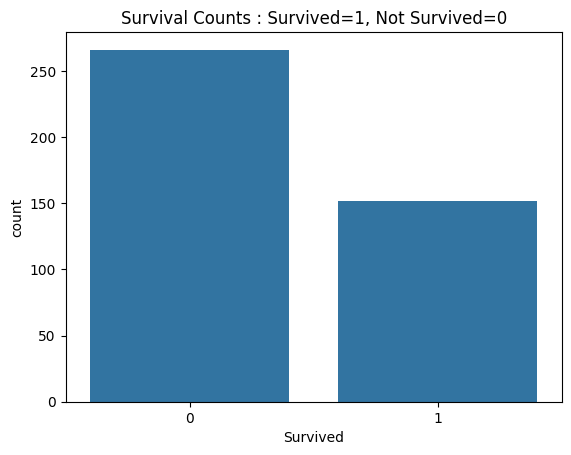

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived',data=df)
plt.title("Survival Counts : Survived=1, Not Survived=0")
plt.show()

As see from the above data, we have total records / people around 418. The above count plot shows that out  of these 418 people, only around 150 people survived.

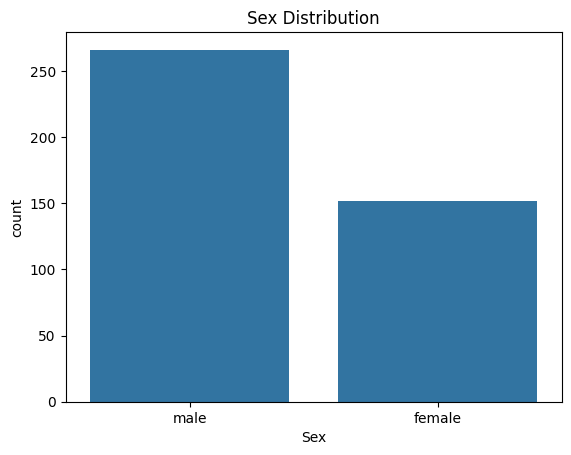

In [102]:
sns.countplot(x="Sex",data=df)
plt.title("Sex Distribution")
plt.show()

This plot tells us that out of 418 people, around 150 were females and rest were males.

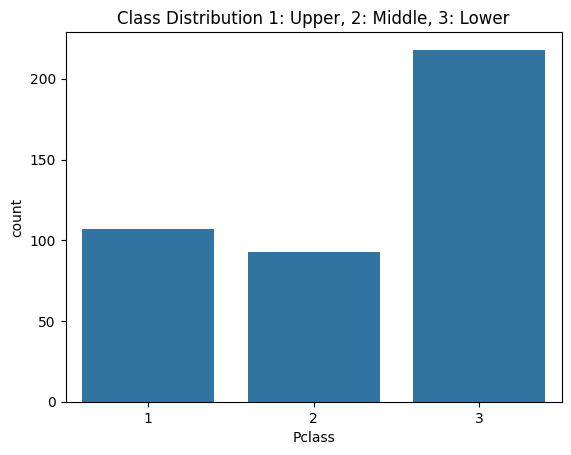

In [107]:
sns.countplot(x="Pclass",data=df)
plt.title("Class Distribution 1: Upper, 2: Middle, 3: Lower")
plt.show()

The above plot tells that out of 418 passengers, 100-120 belonged to upper or elite class, 80-90 belonged to middle class whereas above 200 belonged to lower class.

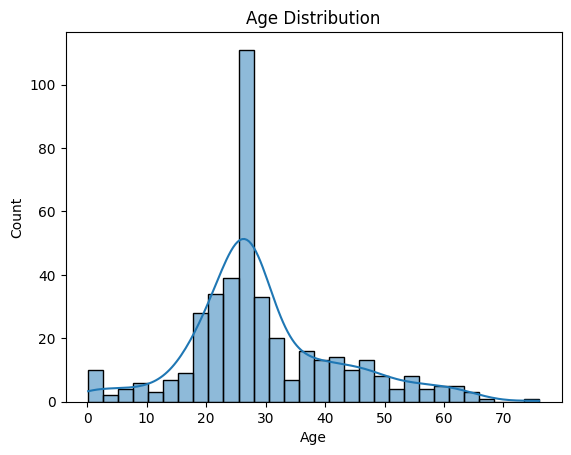

In [104]:
sns.histplot(x="Age",data=df,bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

This age distribution tells us that most of the people on Titanic belonged to 20-40 age group. 

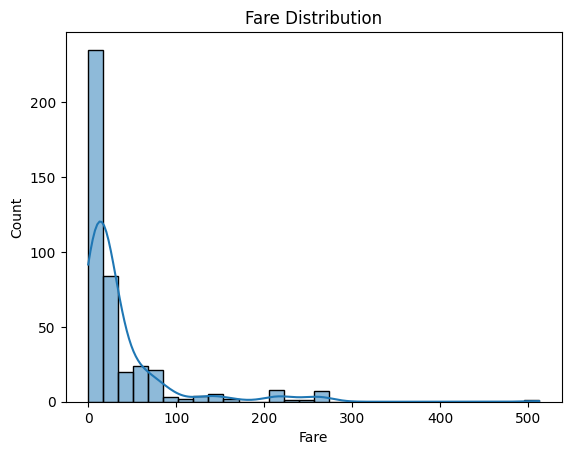

In [105]:
sns.histplot(x="Fare",data=df,bins=30,kde=True)
plt.title("Fare Distribution")
plt.show()

This histogram tells that most of the fares were lower.

# Comparisons or Bivariate Analysis

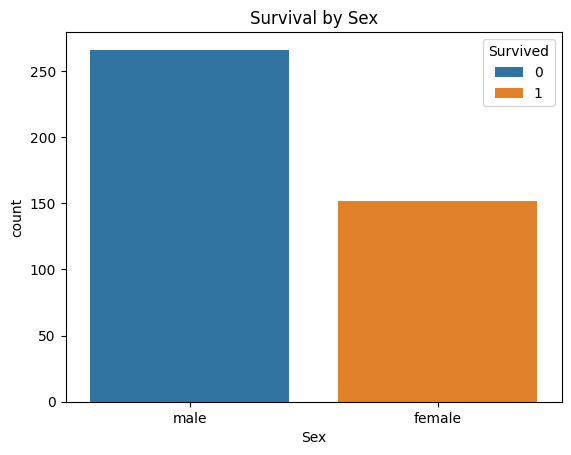

In [113]:
sns.countplot(x="Sex",hue="Survived",data=df)
plt.title("Survival by Sex")
plt.show()

This plot shows the relationship between gender and survival.

Females had a much higher survival rate compared to males.

This indicates that gender was a strong factor in survival, likely because women were prioritized during rescue (“women and children first”).

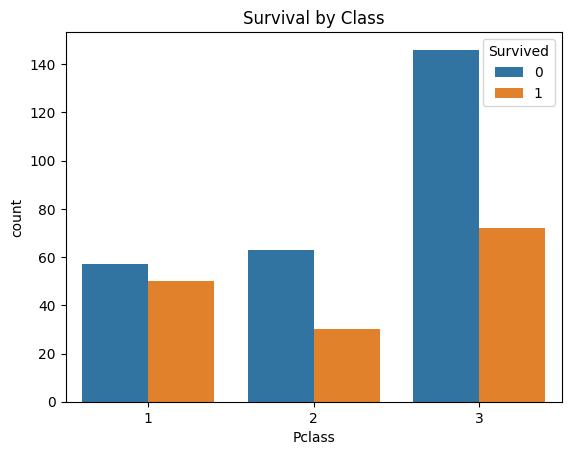

In [120]:
sns.countplot(x="Pclass",hue="Survived",data=df)
plt.title("Survival by Class")
plt.show()

This visualization compares passenger class (1st, 2nd, 3rd) with survival.

Passengers in 1st class had the highest survival rate, while 3rd class passengers had the lowest.

This suggests that social/economic status (Pclass) strongly influenced survival chances.

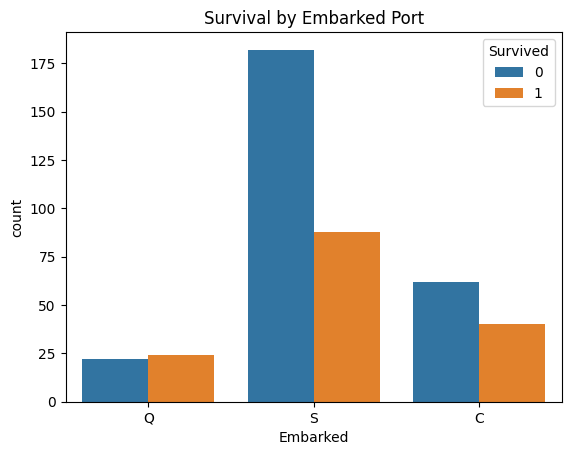

In [127]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title("Survival by Embarked Port")
plt.show()


This plot shows survival distribution based on the port of embarkation.

Passengers who boarded at Cherbourg (C) had higher survival rates than those from Southampton (S) or Queenstown (Q).

This may be correlated with class distribution (more wealthy passengers boarded at C).

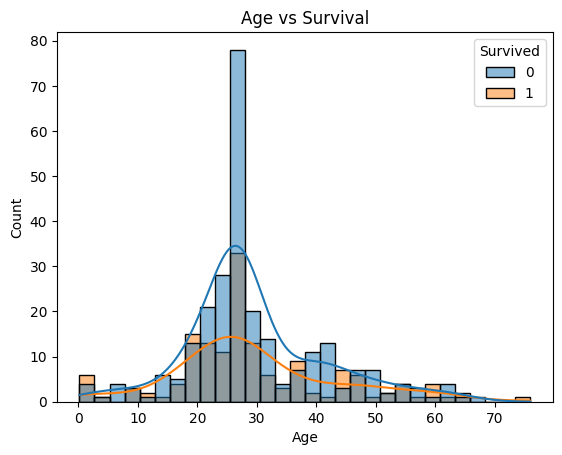

In [128]:
sns.histplot(data=df,x="Age",hue="Survived",bins=30,kde=True)
plt.title("Age vs Survival")
plt.show()

This plot compares survival with passenger age.

Younger children had a higher chance of survival compared to adults.

There is no very strong linear relationship, but age does affect survival (children were given preference).

# Finding Correlations 

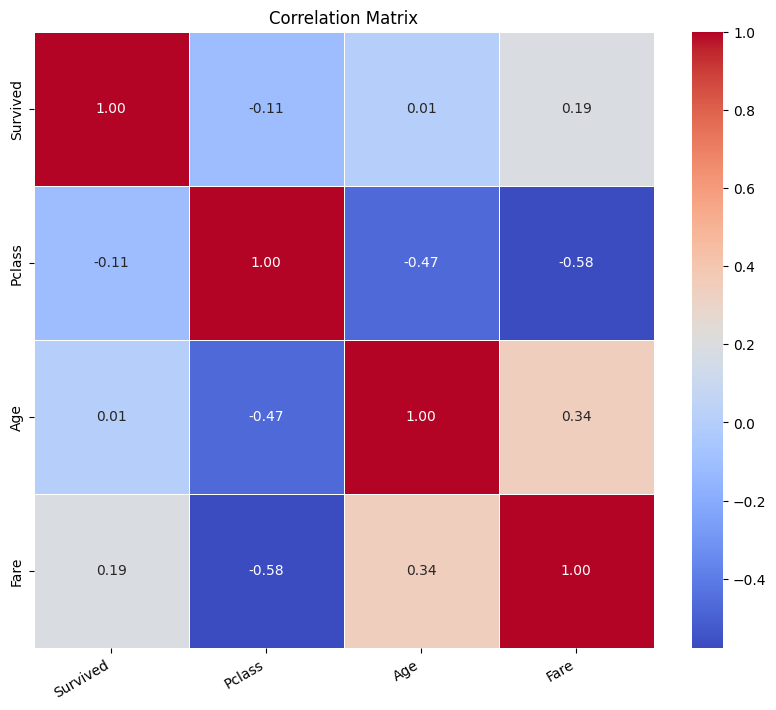

In [133]:
col= ['Survived','Pclass','Age','Fare']

correlation_matrix=df[col].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

The correlation matrix shows the strength and direction of linear relationships between numerical variables.

*Observations:*

Survived & Fare (0.19): Weak positive correlation which can be interpreted as passengers who paid higher fares were slightly more likely to survive.

Survived & Pclass (-0.11): Weak negative correlation which can be interpreted as lower class slightly reduced chances of survival. This matches what we saw earlier.

Age & Fare (0.34): Moderate positive correlation which can be interpreted as older passengers tended to pay higher fares.

Fare & Pclass (-0.58): Strong negative correlation which can be interpreted as higher class passengers paid higher fares, as expected.

Age & Pclass (-0.47): Moderate negative correlation which can be interpreted as older passengers were generally in higher classes.

Survived & Age (0.01): Almost no correlation which can be interpreted as age alone is not a strong predictor of survival, but combined with “Sex” and “Pclass” it matters.

*Conclusion:*
Fare and Pclass are the strongest correlated features here. Survival depends more on categorical factors (Sex, Pclass, Embarked) than purely on numeric correlations.

# **KEY INSIGHTS FROM EDA**

1. Survival was higher among women and children, reflecting the “women and children first” rule followed during the evacuation.

2. Passengers from higher classes (1st class) had a better chance of survival, highlighting the impact of wealth and status on rescue priorities.